## Apply functions to masked images

### Functions to get features of images

In [21]:
import numpy as np
from helpers import *

2023-06-27 13:25:08.373947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 13:25:08.521404: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-27 13:25:17.023535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/carlos.jimenez/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2023-06-27 

In [34]:
import SimpleITK as sitk
import scipy
def volume(img: sitk.Image):
    array = sitk.GetArrayFromImage(img)
    array = np.where(array > 0, 1, 0)
    pixel_volume = img.GetSpacing()[0] * img.GetSpacing()[1] * img.GetSpacing()[2]
    return (array > 0).sum() * pixel_volume

def mean(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMean()

def max(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMaximum()

def median(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMean()

def min(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMinimum()

def sum(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetSum()

def variance(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetVariance()

def RegionalMaxima_(img: sitk.Image):
  transformed = sitk.RegionalMaxima(img)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def ZeroCrossing_(img: sitk.Image):
  transformed = sitk.ZeroCrossing(img)
  
  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def Derivative_(img: sitk.Image):
  transformed = sitk.Derivative(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()


def GradientMagnitudeRecursiveGaussian_(img: sitk.Image):
  transformed = sitk.GradientMagnitudeRecursiveGaussian(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def MorphologicalWatershed_(img: sitk.Image):
  transformed = sitk.MorphologicalWatershed(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()


def ObjectnessMeasure_(img: sitk.Image):
  transformed = sitk.ObjectnessMeasure(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()


def Toboggan_(img: sitk.Image):
  transformed = sitk.Toboggan(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def ZeroCrossingBasedEdgeDetection_(img: sitk.Image):
  transformed = sitk.ZeroCrossingBasedEdgeDetection(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def Z_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[0]

def X_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[1]

def Y_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[2]

fn = [volume,
      max,
      median,  #HC
      #min,  #por mascara minimo saldra 0 
      sum, # HC 
      variance,
      RegionalMaxima_, #HC
      ZeroCrossing_,  #HC
      mean, # HC
      #Derivative_, # constant value
      GradientMagnitudeRecursiveGaussian_,#HC
      MorphologicalWatershed_,
      ObjectnessMeasure_,  #HC
      Toboggan_,  #HC
      ZeroCrossingBasedEdgeDetection_ , #HC,
      Z_,
      X_,
      Y_
]


def get_feature_header():
  return [f.__name__ for f in fn]

def get_feature_vector(img : sitk.Image):
  return [f(img) for f in fn]


## Feature extraction Lacunar and MCA examples

### lacunar and MCA Ids

In [35]:
LACUNAR_IDS = [
  'c0001s0004t01',
  'c0001s0005t01',
  'c0002s0001t01',
  'c0002s0002t01',
  'c0002s0003t01',
  'c0002s0004t01',
  'c0002s0005t01',
  'c0002s0008t01',
  'c0002s0014t01',
  'c0002s0022t01',
  'c0002s0024t01',#
  'c0003s0001t01',
  'c0003s0002t01',
  'c0003s0003t01',
  'c0003s0004t01',
  'c0003s0005t01',
  'c0003s0006t01',
  'c0003s0007t01',
  'c0003s0008t01',
  'c0003s0009t01',
  'c0003s0010t01',
  'c0003s0011t01',
  'c0003s0012t01',
  'c0003s0013t01',
  'c0003s0014t01',
  'c0003s0015t01',
  'c0003s0016t01',
  'c0003s0017t01',
  'c0003s0018t01',
  'c0003s0019t01',
  'c0003s0020t01',
  'c0003s0021t01',
  'c0003s0022t01',
  'c0003s0023t01',
  'c0003s0024t01',
  'c0003s0025t01',
  'c0003s0026t01',
  'c0003s0027t01',
  'c0003s0028t01',
  'c0003s0029t01',
  'c0003s0031t01',
  'c0003s0032t01',
  'c0003s0033t01',
  'c0003s0034t01',
  'c0003s0035t01',
  'c0003s0036t01',
  'c0003s0037t01',
  'c0003s0038t01',
  'c0003s0039t01',
  'c0003s0040t01',
  'c0003s0041t01',
  'c0003s0042t01',
  'c0003s0043t01',
  'c0003s0044t01',
  'c0003s0045t01',
  'c0003s0048t01',
  'c0003s0049t01',
  'c0003s0050t01',
  'c0003s0051t01',
  'c0003s0052t01',
  'c0003s0053t01',
  'c0003s0054t01',
  'c0003s0055t01',
  'c0003s0056t01',
  'c0004s0003t01',
  'c0004s0005t01',
  'c0004s0007t01',
  'c0004s0012t01',
  'c0004s0014t01',
  'c0004s0015t01',
  'c0004s0016t01',
  'c0004s0018t01',
  'c0004s0021t01',
  'c0004s0022t01',
  'c0004s0024t01',
  'c0004s0025t01',
  'c0004s0026t01',
  'c0004s0027t01',
  'c0004s0029t01',
  'c0004s0030t01',
  'c0004s0032t01',
  'c0004s0034t01',
  'c0005s0006t01',
  'c0005s0008t01',
  'c0005s0010t01',
  'c0005s0014t01',
  'c0005s0018t01',
  'c0005s0026t01',
  'c0005s0027t01',
  'c0005s0029t01',
  'c0005s0035t01',
  'c0005s0042t01',
  'c0005s0043t01',
  'c0005s0044t01',
  'c0005s0049t01',
  'c0006s0001t01',
  'c0006s0004t01',
  'c0006s0005t01',
  'c0006s0010t01',
  'c0006s0014t01',
  'c0006s0019t01',
  'c0006s0020t01',
  'c0007s0004t01',
  'c0007s0008t01',
  'c0007s0010t01',
  'c0007s0012t01',
  'c0007s0013t01',
  'c0007s0014t01',
  'c0007s0015t01',
  'c0007s0016t01',
  'c0007s0017t01',
  'c0007s0020t01',
  'c0007s0024t01',
  'c0007s0025t01',
  'c0007s0026t01',
  'c0007s0028t01',
  'c0007s0030t01',
  'c0007s0031t01',
  'c0007s0035t01',
  'c0007s0036t01',
  'c0008s0002t01',
  'c0008s0013t01',
  'c0008s0032t01',
  'c0009s0001t01',
  'c0009s0003t01',
  'c0009s0004t01',
  'c0010s0002t01',
  'c0010s0002t02',
  'c0010s0003t01',
  'c0010s0003t02',
  'c0010s0006t01',
  'c0010s0008t01',
  'c0010s0013t01',
  'c0010s0013t02',
  'c0010s0014t01',
  'c0010s0025t01',
  'c0010s0025t02',
  'c0010s0029t01',
  'c0010s0031t01',
  'c0010s0034t01',
  'c0010s0044t01',
  'c0010s0044t02',
  'c0010s0046t01',
  'c0011s0002t01',
  'c0011s0006t01',
  'c0011s0007t01',
  'c0011s0011t01',
  'c0011s0014t01',
  'c0011s0015t01',
]
MCA_IDS = [
  'c0001s0006t01',
  'c0001s0007t01',
  'c0001s0008t01',
  'c0002s0007t01',
  'c0002s0009t01',
  'c0002s0011t01',  
  'c0002s0012t01',
  'c0002s0013t01',
  'c0002s0015t01',
  'c0002s0018t01',
  'c0002s0019t01',
  'c0002s0020t01',
  'c0002s0021t01',
  'c0002s0025t01',  
  'c0003s0030t01',#
  'c0004s0001t01',
  'c0004s0002t01',
  'c0004s0009t01',
  'c0004s0010t01',
  'c0004s0011t01',
  'c0004s0013t01',
  'c0004s0019t01',
  'c0004s0020t01',
  'c0004s0031t01',
  'c0004s0033t01',
  'c0005s0003t01',
  'c0005s0007t01',
  'c0005s0009t01',
  'c0005s0013t01',
  'c0005s0017t01',
  'c0005s0021t01',
  'c0005s0024t01',
  'c0005s0030t01',
  'c0005s0036t01',
  'c0006s0007t01',
  'c0006s0008t01',
  'c0007s0001t01',
  'c0007s0002t01',
  'c0007s0003t01',
  'c0007s0005t01',
  'c0007s0006t01',
  'c0007s0007t01',
  'c0007s0018t01',
  'c0007s0019t01',
  'c0007s0021t01',
  'c0007s0023t01',
  'c0007s0027t01',
  'c0007s0029t01',
  'c0007s0032t01',
  'c0007s0033t01',
  'c0007s0034t01',
  'c0008s0001t01',
  'c0008s0003t01',
  'c0008s0006t01',
  'c0008s0007t01',
  'c0008s0008t01',
  'c0008s0009t01',
  'c0008s0010t01',
  'c0008s0011t01',
  'c0008s0012t01',
  'c0008s0014t01',
  'c0008s0015t01',
  'c0008s0016t01',
  'c0008s0017t01',
  'c0008s0018t01',
  'c0008s0019t01',
  'c0008s0020t01',
  'c0008s0021t01',
  'c0008s0022t01',
  'c0008s0023t01',
  'c0008s0024t01',
  'c0008s0025t01',
  'c0008s0026t01',
  'c0008s0027t01',
  'c0008s0028t01',
  'c0008s0029t01',
  'c0008s0030t01',
  'c0008s0031t01',
  'c0008s0033t01',
  'c0009s0002t01',
  'c0009s0005t01',
  'c0009s0006t01',
  'c0009s0007t01',
  'c0009s0008t01',
  'c0009s0009t01',
  'c0009s0010t01',
  'c0009s0011t01',
  'c0009s0012t01',
  'c0010s0001t01',
  'c0010s0004t01',
  'c0010s0005t01',
  'c0010s0005t02',
  'c0010s0007t01',
  'c0010s0018t01',
  'c0010s0020t01',
  'c0010s0020t02',
  'c0010s0021t01',
  'c0010s0024t01',
  'c0010s0032t01',
  'c0010s0037t01',
  'c0011s0001t01',
  'c0011s0003t01',
  'c0011s0004t01',
  'c0011s0005t01',
  'c0011s0008t01',
  'c0011s0009t01',
  'c0011s0012t01',
  'c0011s0013t01'
]

### Build csv

In [36]:
def id_from_path(path:str) -> str:
  #may need to be updated if data location change
  return path.split('/')[-1].split('_')[0]

In [37]:
def id_from_mask_path(path:str) -> str:
  #may need to be updated if data location change
  return path.split('/')[-1].split('_')[0]

In [38]:
base_path = '/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions'
datasets_path = f'{base_path}/datasets/paper lesions extended'
models_path = f'{base_path}/modelos/paper lesions extended'
mni_T1_path = TEMPLATE_PATH = f'{base_path}/datasets/templates/mni_icbm152_t1_tal_nlin_sym_09a.nii'

# strategy = tf.distribute.MirroredStrategy()

In [174]:
from glob import glob
from pprint import pprint
path_proccesed_masked = f"{datasets_path}/native_processed_masked_best"

folders =  sorted(glob(f'{path_proccesed_masked}/*'))
ground_truth_masks = sorted(glob(f"{base_path}/datasets/native_registered/*LesionSmooth*"))

print(len(folders))
print(len(ground_truth_masks))
# folders

# f = [id_from_path(x) for x in folders]
# m = [id_from_mask_path(x) for x in ground_truth_masks]

# set(f) - set(m)
folders[:10]

388
299


['/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions/datasets/paper lesions extended/native_processed_masked_best/c0001s0004t01.nii.gz_processed_masked.nii.gz',
 '/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions/datasets/paper lesions extended/native_processed_masked_best/c0001s0004t01_processed_masked.nii.gz',
 '/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions/datasets/paper lesions extended/native_processed_masked_best/c0001s0005t01.nii.gz_processed_masked.nii.gz',
 '/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions/datasets/paper lesions extended/native_processed_masked_best/c0001s0005t01_processed_masked.nii.gz',
 '/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions/datasets/paper lesions extended/native_processed_masked_best/c0001s0006t01.nii.gz_processed_masked.nii.gz',
 '/home/carlos.jimenez/ai-in-health/Stroke-Brain-Lesions/datasets/paper lesions extended/native_processed_masked_best/c0001s0006t01_processed_masked.nii.gz',
 '/home/carlos.jimenez/ai-in-he

In [104]:
f0 = sitk.ReadImage(folders[0], sitk.sitkFloat32)
m0 = sitk.ReadImage(ground_truth_masks[0], sitk.sitkFloat32)

In [121]:
arr = sitk.GetArrayFromImage(f0)
arr = np.where(arr > 0, 1, 0)
# print(arr.max())
arr.sum()

1022

In [122]:
arr = sitk.GetArrayFromImage(m0)
arr = np.where(arr > 0, 1, 0)
# print(arr.max())
arr.sum()

1706

In [106]:
def normalize_img(preprocessed_image):
    preprocessed_image = (preprocessed_image - preprocessed_image.min())/(preprocessed_image.max() - preprocessed_image.min())
    return preprocessed_image

In [125]:
normalize_img(sitk.GetArrayFromImage(f0)).shape

(189, 233, 197)

In [126]:
normalize_img(sitk.GetArrayFromImage(m0)).shape

(189, 233, 197)

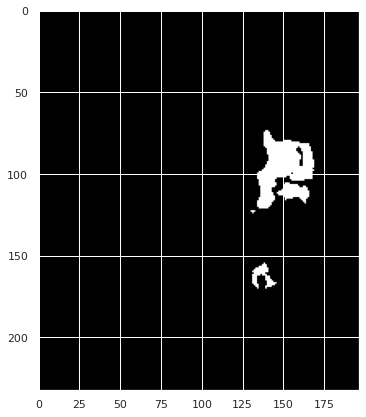

In [41]:

norm_f0 = np.where(sitk.GetArrayFromImage(f0)>0,1,0)
explore_3D_array(norm_f0)

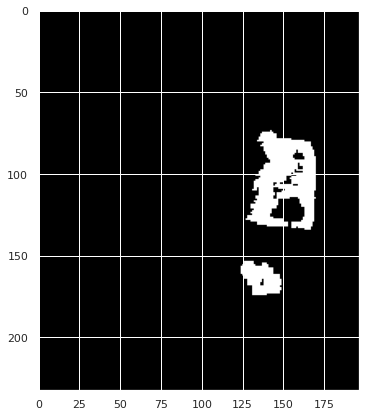

In [42]:
norm_m0 = np.where(sitk.GetArrayFromImage(m0)>0,1,0)
explore_3D_array(norm_m0)

In [43]:
# def id_from_path(path:str) -> str:
#   #may need to be updated if data location change
#   return path.split('/')[-1][:-24]

In [44]:
# ground_truth_masks[:10]

In [45]:
#just MCA and lacunar
whole = MCA_IDS + LACUNAR_IDS
folders_filtered = [ f 
                    for f in folders 
                    if id_from_path(f) in whole]

gt_masks_filtered = [ f 
                    for f in ground_truth_masks 
                    if id_from_mask_path(f) in whole]
print(len(folders_filtered))
len(gt_masks_filtered)

257


257

In [46]:
# 'c0001s0004t01' in whole

In [47]:
from pprint import pprint

header = ["_id"]
header += get_feature_header()
header += ["territory"]
pprint(header)

['_id',
 'volume',
 'max',
 'median',
 'sum',
 'variance',
 'RegionalMaxima_',
 'ZeroCrossing_',
 'mean',
 'GradientMagnitudeRecursiveGaussian_',
 'MorphologicalWatershed_',
 'ObjectnessMeasure_',
 'Toboggan_',
 'ZeroCrossingBasedEdgeDetection_',
 'Z_',
 'X_',
 'Y_',
 'territory']


In [48]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
'c0001s0004t01' in MCA_IDS

False

In [50]:
import pandas as pd

features_pred = pd.DataFrame(columns=['_id', 'volume', 'territory'])

for i, f in enumerate(gt_masks_filtered):
    xpath = f
    ximg = sitk.ReadImage(xpath, sitk.sitkFloat32)

    id = id_from_path(f)
    feature_row = [id, volume(ximg)]
#     feature_row += volume(ximg)

    if id in LACUNAR_IDS:
        feature_row.append(0)
    elif id in MCA_IDS:
        feature_row.append(1)
    else:
        print(i, xpath)
        raise ValueError
    
    features_pred.loc[i] = feature_row
#     print(i, feature_row)
#     explore_3D_array(sitk.GetArrayFromImage(ximg))
#     print(ximg)
#     if i == 0 : break
print('Done!')


Done!


In [51]:
out_path = f"{datasets_path}/volumes_pred.csv"
features_pred.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

In [54]:
import pandas as pd

features = pd.DataFrame(columns=['_id', 'volume', 'territory'])

for i, f in enumerate(gt_masks_filtered):
    xpath = f
    ximg = sitk.ReadImage(xpath, sitk.sitkFloat32)

    id = id_from_path(f)
    feature_row = [id, volume(ximg)]
#     feature_row += volume(ximg)

    if id in LACUNAR_IDS:
        feature_row.append(0)
    elif id in MCA_IDS:
        feature_row.append(1)
    else:
        print(i, xpath)
        raise ValueError
    
    features.loc[i] = feature_row
#     print(i, feature_row)
#     explore_3D_array(sitk.GetArrayFromImage(ximg))
#     print(ximg)
#     if i == 0 : break
print('Done!')


Done!


In [55]:
out_path = f"{datasets_path}/volumes_ground_truth.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

In [52]:
# features

In [53]:
# features.shape

In [105]:
features[features.volume != 0].shape

(257, 18)

In [ ]:
#features = features[features.volume != 0]

In [106]:
out_path = f"{datasets_path}/all_features_ground_truth.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

In [199]:
ground_truth_vols =  dict(zip(features._id, features.volume))
len(ground_truth_vols)

257

## Correlation Analysis

In [56]:
import pandas as pd
features_pred = pd.read_csv(f"{datasets_path}/volumes_pred.csv")

In [57]:
preds_vols =  dict(zip(features_pred._id, features_pred.volume))
len(preds_vols)

257

In [58]:
features = pd.read_csv(f"{datasets_path}/volumes_ground_truth.csv")
ground_truth_vols =  dict(zip(features._id, features.volume))
len(ground_truth_vols)

257

In [60]:
list(ground_truth_vols.values())[:10]

[1706.0,
 27688.0,
 6706.0,
 157937.0,
 113707.0,
 27372.0,
 9512.0,
 26950.0,
 4076.0,
 12297.0]

In [213]:
# np.array(list(preds_vols.values()))

In [59]:
def maximum(a, b):
    if a >= b:
        return 0
    else:
        return 1

In [87]:
features['volume_pred'] = features_pred.volume
features['ratio'] = ratios
features['territory'] = features.pop('territory')
features.head(n=20)

,_id,volume,volume_pred,ratio,territory
0,c0001s0004t01,1706.0,1022.0,0.250733,0
1,c0001s0005t01,27688.0,18906.0,0.188479,0
2,c0001s0006t01,6706.0,2577.0,0.444792,1
3,c0001s0007t01,157937.0,86976.0,0.289740,1
4,c0001s0008t01,113707.0,84513.0,0.147281,1
5,c0002s0001t01,27372.0,17923.0,0.208610,0
6,c0002s0002t01,9512.0,5674.0,0.252733,0
7,c0002s0003t01,26950.0,17002.0,0.226338,0
8,c0002s0004t01,4076.0,2562.0,0.228081,0
9,c0002s0005t01,12297.0,7225.0,0.259809,0


In [137]:
TN = len(features[features.ratio <= .30][features.territory == 0])
TP = len(features[features.ratio <= .30][features.territory == 1])
TN, TP

/tmp/ipykernel_2710512/4182815044.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TN = len(features[features.ratio <= .30][features.territory == 0])
/tmp/ipykernel_2710512/4182815044.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TP = len(features[features.ratio <= .30][features.territory == 1])


(89, 93)

In [138]:
FN = len(features[features.territory == 0]) - TN
FP = len(features[features.territory == 1]) - TP
FN, FP

(60, 15)

In [162]:
confmat = np.array([[TN, FP], [FN, TP]])
confmat_norm = confmat/confmat.sum(axis=1)[:, np.newaxis]
confmat_norm

array([[0.86, 0.14],
       [0.39, 0.61]])

In [156]:
classes = ["Lacunar", "MCA"]

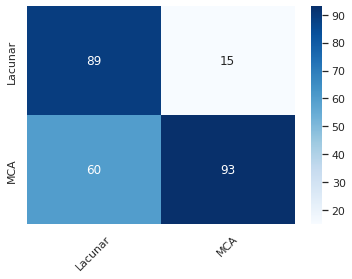

In [172]:
sns.heatmap(confmat, annot=True, fmt='d', cmap='Blues')
tick_marks = np.arange(len(classes))
plt.xticks([0.5, 1.5], classes, rotation=45)
plt.yticks([0.5, 1.5], classes)
plt.savefig(f'{datasets_path}/results/confmat_volumes.jpg',  bbox_inches='tight')

In [134]:
features[features.ratio <= .20][features.territory == 1]

/tmp/ipykernel_2710512/1662083511.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features[features.ratio <= .20][features.territory == 1]


,_id,volume,volume_pred,ratio,territory
4,c0001s0008t01,113707.0,84513.0,0.147281,1
10,c0002s0007t01,115851.0,83093.0,0.164659,1
12,c0002s0009t01,37180.0,28318.0,0.135302,1
13,c0002s0011t01,84851.0,86764.0,-0.011147,1
14,c0002s0012t01,98006.0,84643.0,0.073162,1
...,...,...,...,...,...
245,c0011s0003t01,191222.0,160847.0,0.086276,1
246,c0011s0004t01,162817.0,123992.0,0.135369,1
247,c0011s0005t01,272621.0,233871.0,0.076507,1
250,c0011s0008t01,172070.0,142995.0,0.092283,1


In [127]:
round(182*100/257, 2)

70.82

In [68]:
features_pred

,_id,volume,territory
0,c0001s0004t01,1022.0,0
1,c0001s0005t01,18906.0,0
2,c0001s0006t01,2577.0,1
3,c0001s0007t01,86976.0,1
4,c0001s0008t01,84513.0,1
...,...,...,...
252,c0011s0011t01,11379.0,0
253,c0011s0012t01,20059.0,1
254,c0011s0013t01,5833.0,1
255,c0011s0014t01,22518.0,0


In [73]:
# ratios
# classes

0      0
1      0
2      1
3      1
4      1
      ..
252    0
253    1
254    1
255    0
256    0
Name: territory, Length: 257, dtype: int64

In [81]:
ratios = []
ground_truth = []
y_pred = []
threshold = .1
classes = features.territory
for g, p in zip(ground_truth_vols.values(), preds_vols.values()):
    idx = maximum(g, p)
    percentage = (g-p)/(g+p)
    ratios.append(percentage)
    if percentage >= 0:
        ground_truth.append(1)
        if percentage <= threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)
    elif percentage <= 0:
        ground_truth.append(0)
        if abs(percentage) <= threshold:
            y_pred.append(0)
        else:
            y_pred.append(1)

In [82]:
confmat = confusion_matrix(ground_truth, y_pred)
confmat

array([[  2,   4],
       [231,  20]])

In [21]:
features = features[features.volume != 0]
features = features.drop(columns=['_id','territory'])
features.shape

(256, 16)

In [22]:
corrmat = features.corr() 
corrmat

,volume,max,median,sum,variance,RegionalMaxima_,ZeroCrossing_,mean,GradientMagnitudeRecursiveGaussian_,MorphologicalWatershed_,ObjectnessMeasure_,Toboggan_,ZeroCrossingBasedEdgeDetection_,Z_,X_,Y_
volume,1.000000,0.472594,0.978095,0.978095,0.929193,0.973879,0.910593,0.978095,0.937267,0.825059,0.913883,0.817831,0.974656,0.134608,0.045342,0.159484
max,0.472594,1.000000,0.531179,0.531179,0.565779,0.495602,0.542352,0.531179,0.535619,0.245726,0.539260,0.240697,0.515309,-0.058386,0.091782,0.214279
median,0.978095,0.531179,1.000000,1.000000,0.984578,0.965488,0.935615,1.000000,0.966509,0.730691,0.943095,0.721335,0.972097,0.180220,0.033716,0.185253
sum,0.978095,0.531179,1.000000,1.000000,0.984578,0.965488,0.935615,1.000000,0.966509,0.730691,0.943095,0.721335,0.972097,0.180220,0.033716,0.185253
variance,0.929193,0.565779,0.984578,0.984578,1.000000,0.933329,0.934270,0.984578,0.968971,0.620471,0.948216,0.610208,0.942883,0.218568,0.018505,0.198524
RegionalMaxima_,0.973879,0.495602,0.965488,0.965488,0.933329,1.000000,0.964349,0.965488,0.974529,0.734657,0.969754,0.728226,0.991627,0.136625,0.040194,0.206983
ZeroCrossing_,0.910593,0.542352,0.935615,0.935615,0.934270,0.964349,1.000000,0.935615,0.981818,0.584998,0.990797,0.577119,0.975280,0.186073,0.005609,0.247966
mean,0.978095,0.531179,1.000000,1.000000,0.984578,0.965488,0.935615,1.000000,0.966509,0.730691,0.943095,0.721335,0.972097,0.180220,0.033716,0.185253
GradientMagnitudeRecursiveGaussian_,0.937267,0.535619,0.966509,0.966509,0.968971,0.974529,0.981818,0.966509,1.000000,0.615772,0.993527,0.607367,0.977150,0.200113,0.027326,0.226463
MorphologicalWatershed_,0.825059,0.245726,0.730691,0.730691,0.620471,0.734657,0.584998,0.730691,0.615772,1.000000,0.581121,0.999734,0.728565,0.035619,-0.002612,0.016684


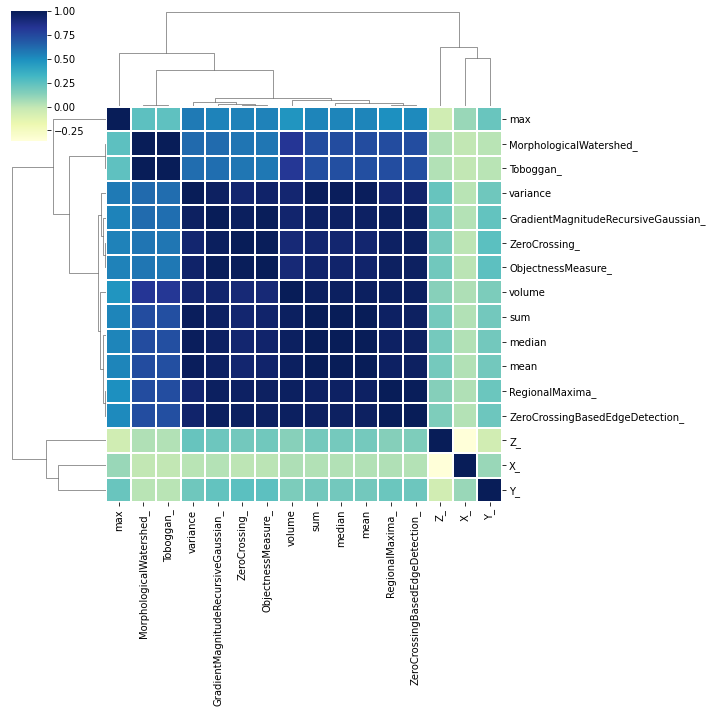

In [23]:
# https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/#:~:text=To%20remove%20the%20correlated%20features,the%20columns%20of%20the%20dataframe.
# https://h1ros.github.io/posts/drop-highly-correlated-features/
# https://www.geeksforgeeks.org/exploring-correlation-in-python/

import seaborn as sns 
import matplotlib.pyplot as plt

#f, ax = plt.subplots(figsize =(9, 8)) 
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 

In [24]:
# Index(['volume', 'max', 'median', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'], dtype='object')

import numpy as np
#https://h1ros.github.io/posts/drop-highly-correlated-features/
threshold = 0.95

df_corr = corrmat
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_columns = features.columns[columns]
selected_columns

Index(['volume', 'max', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'], dtype='object')

In [25]:
#https://h1ros.github.io/posts/drop-highly-correlated-features/
threshold = 0.96

df_corr = corrmat
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_columns = features.columns[columns]
selected_columns

Index(['volume', 'max', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'], dtype='object')

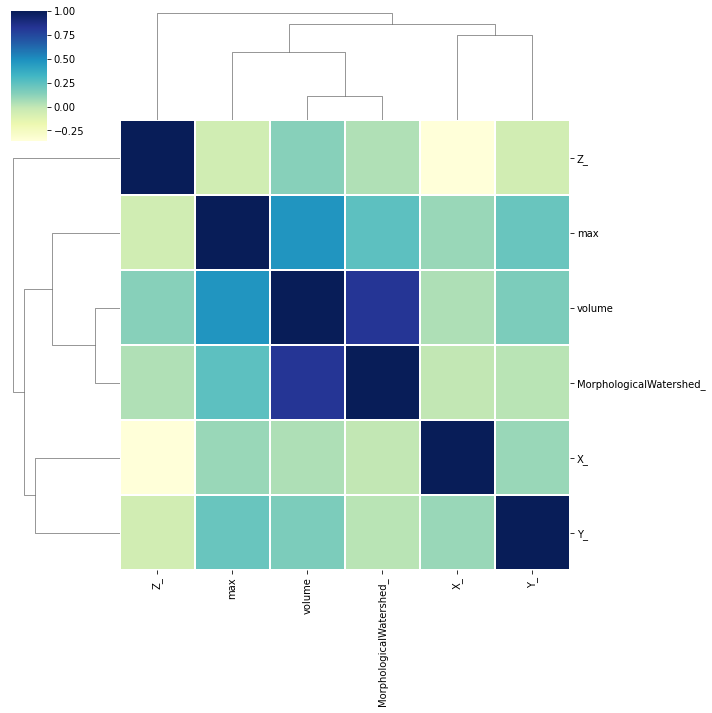

In [26]:
corrmat2 = features[selected_columns].corr() 

cg2 = sns.clustermap(corrmat2, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg2.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg2 

constant check

In [27]:
from sklearn.feature_selection import VarianceThreshold
qconstant_filter = VarianceThreshold(threshold=0.01)
train_features = features
qconstant_filter.fit(train_features)


VarianceThreshold(threshold=0.01)

In [28]:
len(train_features.columns[qconstant_filter.get_support()])

16

In [29]:
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))


0


In [30]:
for column in qconstant_columns:
    print(column)

## Save csvs after correlation

### Save dataset with all feats

In [31]:
import pandas as pd
features = pd.read_csv(out_path)

In [32]:
features = features[features.volume != 0]
features = features.drop(columns=['_id'])
features.shape

(256, 17)

In [33]:
out_path = f"{datasets_path}/20230620_all_features_without_0_vals.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

### Save dataset with only main features

In [34]:
import pandas as pd
features = pd.read_csv(out_path)

In [35]:
main_cols = ['volume', 'max', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'] + ["territory"]
features = features[features.volume != 0]
features = features[main_cols]
features.shape

(256, 7)

In [36]:
features.head()

,volume,max,MorphologicalWatershed_,Z_,X_,Y_,territory
0,1022.0,64.731644,8677277.0,89.418561,118.063484,74.397178,0
1,18906.0,65.639984,9234832.0,97.018884,141.261722,116.524413,0
2,2577.0,63.612011,8685092.0,118.760225,137.257446,52.043040,1
3,86976.0,73.266624,20182580.0,105.381807,105.046152,142.975694,1
4,84513.0,66.623680,31745853.0,75.508738,153.342847,135.489437,1


In [37]:
out_path = f"{datasets_path}/20230620_main_features.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

## Evaluate ML models

In [11]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [12]:
# cargar la base
def load_dataset(full_path):
    # cargar como numpy array
    data = read_csv(full_path)
    data = data.values
    print(data)
    # split input - output 
    X, y = data[:, :-1], data[:, -1]
    # clases 0 y 1
    y = LabelEncoder().fit_transform(y)
    return X, y

In [13]:
# evaluar el modelo
def evaluate_model(X, y, model):
    # procedimiento de evaluación
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluar modelo
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

In [14]:
# definir modelos a probar
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs', class_weight='balanced'))
    names.append('LR')
    # SVM
    models.append(SVC(gamma='scale', class_weight='balanced'))
    names.append('SVM')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')

    # MLP
    models.append(MLPClassifier(hidden_layer_sizes=(128,64,32)))
    names.append('MLP')
    return models, names

In [15]:
# ubicación
# out_path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
# out_path+= "20230523_all_features_without_0_vals.csv"
out_path = f"{datasets_path}/20230620_main_features.csv"
full_path = out_path

In [16]:
# cargar la base
X, y = load_dataset(full_path)

[[1.02200000e+03 6.47316437e+01 8.67727700e+06 ... 1.18063484e+02
  7.43971780e+01 0.00000000e+00]
 [1.89060000e+04 6.56399841e+01 9.23483200e+06 ... 1.41261722e+02
  1.16524413e+02 0.00000000e+00]
 [2.57700000e+03 6.36120110e+01 8.68509200e+06 ... 1.37257446e+02
  5.20430399e+01 1.00000000e+00]
 ...
 [5.83300000e+03 6.41648560e+01 8.79042600e+06 ... 1.14187660e+02
  6.49668321e+01 1.00000000e+00]
 [2.25180000e+04 7.01438446e+01 9.53650300e+06 ... 1.17882599e+02
  1.22777053e+02 0.00000000e+00]
 [6.54000000e+03 6.93646317e+01 8.75388400e+06 ... 1.21110689e+02
  7.24950854e+01 0.00000000e+00]]


In [44]:
X[:,0]

array([1.02200e+03, 1.89060e+04, 2.57700e+03, 8.69760e+04, 8.45130e+04,
       1.79230e+04, 5.67400e+03, 1.70020e+04, 2.56200e+03, 7.22500e+03,
       8.30930e+04, 1.87030e+04, 2.83180e+04, 8.67640e+04, 8.46430e+04,
       4.16920e+04, 4.80000e+01, 4.88690e+04, 8.15700e+03, 8.96710e+04,
       9.84000e+02, 9.27400e+03, 1.94000e+03, 2.66000e+03, 2.37930e+04,
       5.54000e+02, 2.03800e+03, 2.47000e+02, 4.06800e+03, 3.63800e+03,
       1.00000e+00, 5.05200e+03, 5.80000e+01, 9.24000e+02, 2.26400e+03,
       7.75000e+02, 7.41000e+02, 6.01000e+02, 9.80000e+02, 1.33500e+03,
       9.70000e+01, 2.65000e+02, 7.68000e+02, 2.68400e+03, 1.54500e+03,
       3.60000e+01, 4.80000e+01, 1.26000e+02, 4.81500e+03, 4.30100e+03,
       3.61000e+02, 9.14000e+02, 6.60000e+01, 1.01000e+03, 8.27000e+02,
       5.35000e+03, 6.81000e+03, 5.16000e+02, 1.14740e+04, 1.40600e+03,
       5.87700e+03, 7.92000e+02, 1.12900e+03, 7.20000e+02, 5.50000e+02,
       6.56000e+02, 1.64600e+03, 1.08000e+02, 1.40000e+03, 1.920

In [45]:
# >LR 0.844 (0.104)
# >SVM 0.929 (0.055)
# >RF 0.950 (0.040)
# >MLP 0.920 (0.065)

# (249, 16) ; all features
# >LR 0.896 (0.057)
# >SVM 0.930 (0.039)
# >RF 0.948 (0.034)
# >MLP 0.920 (0.052)

# (249, 6) ; main features
# >LR 0.863 (0.058)
# >SVM 0.935 (0.037)
# >RF 0.957 (0.027)
# >MLP 0.918 (0.051)

# repeat with 20% less of test set

# definir modelos
models, names = get_models()
results = list()
# evaluar cada modelo
for i in range(len(models)):
    # definir pipeline
    steps = [('p', PowerTransformer()), ('m',models[i])]
    pipeline = Pipeline(steps=steps)
    # evaluar pipeline y guardar resultados
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # resumen
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.846 (0.079)
>SVM 0.937 (0.059)
>RF 0.961 (0.036)
>MLP 0.909 (0.059)


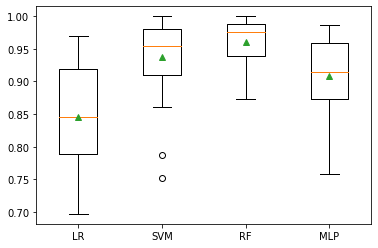

In [54]:
# plot de los resultados
fig, ax = plt.subplots()
ax.boxplot(results, labels=names, showmeans=True)
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
pyplot.savefig(f'{datasets_path}/results/boxplot_ml_models.jpg',  bbox_inches='tight')
pyplot.show()

### Get a confussion matrix from RF

In [24]:
class_names = ["Lacunar", "MCA"]

In [47]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

def evaluate_volume_feature(data_x, data_y):
    k_fold = KFold(10, shuffle=True, random_state=1)
    # k_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]
        
        train_x_vol = train_x[:,0]
#         train_x_vol = train_x[:,0]
        test_x_vol = test_x[:,0]
#         train_x_vol = train_x[:,0]
        print(train_x_vol)
        print(test_x_vol)
#         print(train_x.shape, train_y.shape)
#         print(test_x.shape, test_y.shape)

#         # Fit the classifier
#         model = RandomForestClassifier(n_estimators=1000)
#         steps = [('p', PowerTransformer()), ('m',model)]
#         pipeline = Pipeline(steps=steps)
#         classifier = pipeline.fit(train_x, train_y)

#         # Predict the labels of the test set samples
#         predicted_labels = classifier.predict(test_x)

#         predicted_targets = np.append(predicted_targets, predicted_labels)
#         actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets


def evaluate_specific_model(data_x, data_y):
    k_fold = KFold(10, shuffle=True, random_state=1)
    # k_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # Fit the classifier
        model = RandomForestClassifier(n_estimators=1000)
        steps = [('p', PowerTransformer()), ('m',model)]
        pipeline = Pipeline(steps=steps)
        classifier = pipeline.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets


def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
    pyplot.savefig(f'{datasets_path}/results/confmat_ml_models.jpg',  bbox_inches='tight')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    pyplot.savefig(f'{datasets_path}/results/confmat_normalized_ml_models.jpg',  bbox_inches='tight')
    plt.show()
  
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix


In [48]:
evaluate_volume_feature(X, y)

[1.02200e+03 1.89060e+04 2.57700e+03 8.69760e+04 1.79230e+04 5.67400e+03
 1.70020e+04 2.56200e+03 7.22500e+03 8.30930e+04 1.87030e+04 2.83180e+04
 8.67640e+04 8.46430e+04 4.16920e+04 4.80000e+01 4.88690e+04 8.15700e+03
 8.96710e+04 9.84000e+02 9.27400e+03 1.94000e+03 2.66000e+03 2.37930e+04
 5.54000e+02 2.03800e+03 4.06800e+03 3.63800e+03 1.00000e+00 5.05200e+03
 5.80000e+01 9.24000e+02 7.75000e+02 7.41000e+02 6.01000e+02 9.80000e+02
 1.33500e+03 9.70000e+01 2.65000e+02 7.68000e+02 2.68400e+03 3.60000e+01
 4.80000e+01 1.26000e+02 4.81500e+03 4.30100e+03 3.61000e+02 6.60000e+01
 1.01000e+03 8.27000e+02 5.35000e+03 6.81000e+03 5.16000e+02 1.14740e+04
 1.40600e+03 5.87700e+03 7.92000e+02 7.20000e+02 5.50000e+02 6.56000e+02
 1.64600e+03 1.08000e+02 1.40000e+03 1.92000e+03 3.26000e+02 1.23000e+02
 4.80000e+01 7.49000e+02 3.81000e+02 1.15000e+04 1.38000e+02 2.98000e+02
 1.14177e+05 1.10754e+05 7.26000e+02 2.66790e+04 4.89100e+03 1.00000e+00
 8.28790e+04 1.44360e+04 9.84800e+03 1.26370e+04 5.

(array([], dtype=float64), array([], dtype=float64))

In [26]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3234: RuntimeWarning: divide by zero encounte

Confusion matrix, without normalization


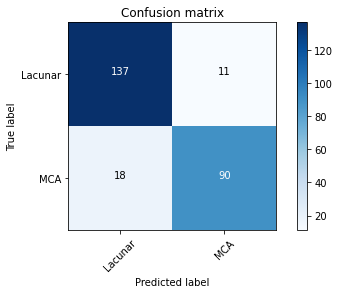

Normalized confusion matrix


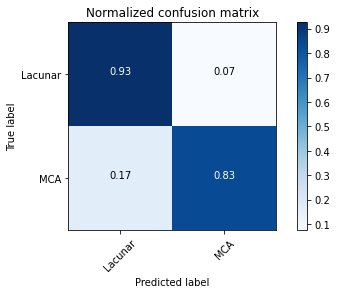

In [62]:
predicted_target, actual_target = evaluate_specific_model(X, y)
plot_confusion_matrix(predicted_target, actual_target)

## Test prediction !?

In [ ]:
# cargar la base
def load_dataset(full_path):
    # cargar como numpy array
    data = read_csv(full_path)
    data = data.values
    print(data)
    # split input - output 
    X, y = data[:, :-1], data[:, -1]
    # clases 0 y 1
    y = LabelEncoder().fit_transform(y)
    return X, y

In [ ]:
full_path = f'{base_path}/datasets/csv/20201225_mca_and_lacunar.csv'

In [ ]:
X, y = load_dataset(full_path)

[[1.08000000e+03 8.98987808e+01 4.30134900e-01 ... 1.24714345e+02
  7.81609094e+01 0.00000000e+00]
 [2.02200000e+03 9.51588058e+01 1.35011350e+00 ... 1.24087514e+02
  1.26236012e+02 0.00000000e+00]
 [3.36000000e+02 8.31819153e+01 1.16081287e-01 ... 1.13198584e+02
  6.65797069e+01 0.00000000e+00]
 ...
 [7.27900000e+03 9.11371231e+01 1.04778311e+00 ... 1.15209729e+02
  6.65553382e+01 1.00000000e+00]
 [2.16390000e+04 9.77653656e+01 1.02413774e+01 ... 1.17543672e+02
  1.25858838e+02 0.00000000e+00]
 [8.43300000e+03 9.63045959e+01 5.46200848e+00 ... 1.26903079e+02
  7.13877821e+01 0.00000000e+00]]


In [ ]:
#y[55] -> 1
#y[59] -> 1

#y[52] -> 0
#y[53] -> 0
X[55], X[59]

(array([1.20720000e+05, 9.90288010e+01, 2.02001708e+01, 1.34703163e+08,
        7.33112242e+01, 1.15475155e+02, 1.46575685e+02]),
 array([8.57200000e+03, 3.89640719e-01, 5.05314744e-05, 8.83901200e+06,
        1.20361492e+02, 1.09528212e+02, 1.36125785e+02]))

In [ ]:
model = RandomForestClassifier(n_estimators=1000)
pipeline = Pipeline(steps=[('p',PowerTransformer()), ('m',model)])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 7), (160,), (41, 7), (41,))

In [ ]:
# entrenar model
pipeline.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(memory=None,
         steps=[('p',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('m',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
      

In [ ]:
from joblib import dump, load
path= '/content/drive/MyDrive/integradora_fiec/modelos/' + 'pipeline_random_forest_95_acc.joblib'
dump(pipeline, path)

['/content/drive/MyDrive/integradora_fiec/modelos/pipeline_random_forest_95_acc.joblib']

In [ ]:
_pipeline = load(path)

In [ ]:
# evaluar unos casos(class 0)
data = [
        [1.67000000e+02, 7.88906326e+01, 7.78532179e-02, 8.67525700e+06,
        8.29662079e+01, 1.22525581e+02, 7.00238445e+01],
        [3.99000000e+02, 8.65921783e+01, 1.64175692e-01, 8.67542300e+06,
        9.49797327e+01, 1.16707743e+02, 1.20460677e+02]
]
for row in data:
    # predicciones
    yhat = _pipeline.predict([row])
    print(_pipeline.predict_proba([row]))
    # obtener label
    label = yhat[0]
    # resumen
    print('>Predicción=%d (esperado 0)' % (label))

[[0.985 0.015]]
>Predicción=0 (esperado 0)
[[0.991 0.009]]
>Predicción=0 (esperado 0)


In [ ]:
# evaluate on some  (known class 1)
data = [
[1.20720000e+05, 9.90288010e+01, 2.02001708e+01, 1.34703163e+08,
        7.33112242e+01, 1.15475155e+02, 1.46575685e+02],
 [8.57200000e+03, 3.89640719e-01, 5.05314744e-05, 8.83901200e+06,
        1.20361492e+02, 1.09528212e+02, 1.36125785e+02]
    ]
for row in data:
    # predicciones
    yhat = pipeline.predict([row])
    # obtener label
    label = yhat[0]
    # resumen
    print('>Predicción=%d (esperado 1)' % (label))

>Predicción=1 (esperado 1)
>Predicción=1 (esperado 1)


## Test prediction for prod !?

In [ ]:
import SimpleITK as sitk
import scipy
def volume(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  pixel_volume = img.GetSpacing()[0] * img.GetSpacing()[1] * img.GetSpacing()[2]
  return (array > 0).sum() * pixel_volume

def max(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMaximum()

def variance(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetVariance()

def MorphologicalWatershed_(img: sitk.Image):
  transformed = sitk.MorphologicalWatershed(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def Z_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[0]

def X_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[1]

def Y_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[2]

def get_feature_vector(img : sitk.Image):
  fn = [
    volume,
    max,
    variance,
    MorphologicalWatershed_,
    Z_,
    X_,
    Y_
  ]
  return [f(img) for f in fn]


In [ ]:
import joblib
path= '/content/drive/MyDrive/integradora_fiec/modelos/' + 'pipeline_random_forest_95_acc.joblib'
_pipeline = joblib.load(path)

In [ ]:
xpath = '/content/c0003s0005t01_t1w_stx.nii.gz'
ypath = '/content/c0003s0005t01_t1w_stx_maskGenerated.nii.gz'


In [ ]:
ximg = sitk.ReadImage(xpath, sitk.sitkFloat32)
yimg = sitk.ReadImage(ypath, sitk.sitkFloat32)
yimg = sitk.Divide(yimg, 255.0) # because mask comes with values in {255,0}

masked = sitk.Multiply(ximg, yimg)

feature_row = get_feature_vector(masked)


pred = _pipeline.predict_proba([feature_row])
{
    'Lacunar' : pred[0][0],
    'MCA' : pred[0][1]
}

{'Lacunar': 0.981, 'MCA': 0.019}

In [8]:
out_path = f"{datasets_path}/20230620_main_features.csv"
import pandas as pd

df = pd.read_csv(out_path)
df

,volume,max,MorphologicalWatershed_,Z_,X_,Y_,territory
0,1022.0,64.731644,8677277.0,89.418561,118.063484,74.397178,0
1,18906.0,65.639984,9234832.0,97.018884,141.261722,116.524413,0
2,2577.0,63.612011,8685092.0,118.760225,137.257446,52.043040,1
3,86976.0,73.266624,20182580.0,105.381807,105.046152,142.975694,1
4,84513.0,66.623680,31745853.0,75.508738,153.342847,135.489437,1
...,...,...,...,...,...,...,...
251,11379.0,71.441116,8948566.0,84.289328,129.461639,122.436380,0
252,20059.0,71.964378,9459820.0,85.353310,136.228534,127.677008,1
253,5833.0,64.164856,8790426.0,80.916926,114.187660,64.966832,1
254,22518.0,70.143845,9536503.0,99.221017,117.882599,122.777053,0
